# Logistic Regression

## Basics

The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

### Binary Classification

Given a data sample $x=(1, x_1,\dots,x_p)^\top\in\mathbb{R}^{p+1}$ with $p$ features, logistic model first computes a linear function:

$$
f(x; \theta) := \theta^\top x = \sum_{i=1}^{p} \theta_i x_i + \theta_0
$$

where $\theta=(\theta_0, \theta_1,\dots,\theta_p)^\top\in\mathbb{R}^{p+1}$ are the parameters of logistic model and are to be learned from training samples.

Then we obtain the probability predicting that $x$ belongs to Class 1 by applying sigmoid function to the linear output $f$:

$$
P(Y=1|X=x) := \frac{1}{1+ e^{-f(x; \theta)}} = \frac{1}{1+ e^{-x^\top  \theta }}
$$ 

<img src = 'https://nickmccullum.com/images/python-deep-learning/deep-learning-activation-functions/sigmoid-function.png' width="400">

and the probability predicting that $x$ belongs to Class 0

$$
P(Y=0|X=x) = 1 - P(Y=1|X=x) =\frac{e^{-f(x;\theta)}}{1+ e^{-f(x;\theta)}} = \frac{e^{-x^\top  \theta }}{1+ e^{-x^\top  \theta }}
$$

Together, we have the probabilty distribution predicted by model: 

$$
\left(\frac{1}{1+ e^{-x^\top  \theta}}, 1 - \frac{1}{1+ e^{-x^\top  \theta }}\right)
$$

<img src='../figs/07_BinaryLR.png' width = '800'>


#### Cross-Entropy Loss 
Cross-entropy function measures the discrepancy of two probability ditributions $P = (p_1, 1 - p_1)$ and $Q = (q_1, 1- q_1)$, given by

$$
 - p_1\log q_1 - (1-p_1)\log (1-q_1)
$$

For fixed $P$, cross-entropy is minimized when $Q = P$.

For each training sample $\{x , y\}$ with features $x\in\mathbb{R}^{p+1}$ and label $y\in\{0,1\}$ (**sometimes stored as one-hot vectors (1,0) or (0,1) in practice**), we have the predicted probabilites 

$$
Q = \left(\frac{1}{1+ e^{-x^\top  \theta}}, 1 - \frac{1}{1+ e^{-x^\top  \theta }}\right)
$$

and the true/targeted probabilites 

$$
P = (y, 1-y).
$$

Therefore, the cross-entropy loss for this sample, given the logistic model parameters $\theta$, is

\begin{align*}
l(\theta; \{x, y\}) = & - y \log \frac{1}{1+ e^{-x^\top  \theta }} - (1-y) \log \left(1 - \frac{1}{1+ e^{-x^\top  \theta}}\right)\\
= & \begin{cases}
- \log \frac{1}{1+ e^{-x^\top  \theta }}  &  \mbox{if } y=1 \\
- \log  \frac{e^{-x^\top  \theta }}{1+ e^{-x^\top  \theta}} &  \mbox{if } y=0
\end{cases}
\end{align*}

The training loss is 

$$
L(\theta) = \frac{1}{n}\sum_{\{x,y\}\in \mbox{trainset}} l(\theta; \{x, y\})
$$

To learn the optimal parameters, we solve 

$$
\theta^* = \arg\min_{\theta} \;  L(\theta) + \lambda R(\theta) 
$$

where $R(\theta)$ is a regularization term, e.g., $\ell_2$ penalty: $\|\theta\|^2$;  $\ell_1$ penalty: $\|\theta\|_1$. $\lambda\geq0$ is the regularization stength.

#### Inference 
Make prediction using the trained logistic model with parameters $\theta^*$. For any sample with features $x$, its predicted class probabilites are 

$$
\left(\frac{1}{1+ e^{- x^\top \theta^*}}, \frac{e^{-x^\top \theta^* }}{1+ e^{- x^\top \theta^*}}\right).
$$

We predict Class 1 if $x^\top \theta^* > 0$ and Class 0 otherwise.

The **classification accuracy** of a machine learning model is evaluated on a labeled data set: 

$$
\frac{\# \mbox{ correctly classified samples}}{\# \mbox{ samples in total}}
$$

### $K$-Class Classification

For $1\leq k\leq K$, compute the $k$-th linear function:
$$
f(x; \theta_k) := x^\top \theta_k  = \sum_{i=1}^p \theta_{k,i} x_i + \theta_{k,0}
$$
where $\theta_k = (\theta_{k,0},\theta_{k,1},\dots, \theta_{k,p})^\top\in\mathbb{R}^{p+1}$ are parameters. There are in total $(p+1)K$ parameters for $K$-class logistic model.

The predicted probabilities are computed by applying [**softmax function**](https://en.wikipedia.org/wiki/Softmax_function) to the $K$ outputs of linear functions:

$$
P(Y=k|X=x) = \frac{e^{f(x;\theta_k)}} {\sum_{k=1}^{K} e^{f(x;\theta_k)}} = \frac{e^{x^\top \theta_k}}{\sum_{k=1}^{K} e^{x^\top \theta_k}}, \quad \mbox{for } 1\leq k\leq K
$$


The one-hot labels $(0,\dots,1,\dots,0)\in\mathbb{R}^K$ can be viewed as true probabilty distribution. Then the cross entropy loss is

\begin{align*}
l(\Theta; \{x, y\}) =
- \log \frac{e^{x^\top \theta_k }}{\sum_{k=1}^{K} e^{x^\top \theta_k} } , \quad \mbox{for } 1\leq k\leq K
\end{align*}

where $\Theta = (\theta_1, \dots, \theta_{K})\in\mathbb{R}^{(p+1)\times K}$ .

To learn the optimal parameters, we solve 

$$
\min_{\Theta} \;  L(\Theta) + \lambda R(\Theta): = \frac{1}{n}\sum_{\{x,y\}\in \mbox{trainset}} l(\Theta; \{x, y\}) +  \lambda R(\Theta)
$$

<img src='../figs/07_MNIST_LR.png' width = '800'>

## Titanic Data Set

We use logistic regression for binary classification - survival or deceased.

Titanic Data Set:

* survival:	0 = No, 1 = Yes
* pclass: Ticket class,	1 = 1st, 2 = 2nd, 3 = 3rd
* sex: Sex	
* Age: Age in years	
* sibsp: # of siblings / spouses aboard the Titanic	
* parch: # of parents / children aboard the Titanic	
* ticket: Ticket number	
* fare: Passenger fare	
* cabin: Cabin number	
* embarked: Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read in the titanic_train.csv file into a pandas dataframe.**

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
print(titanic.isnull())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

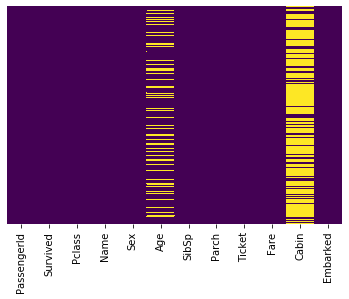

In [5]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with imputation. Too much missing data in the Cabin column. We'll drop this column later.

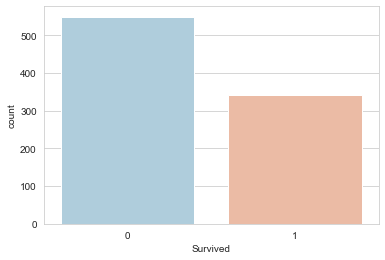

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic,palette='RdBu_r')

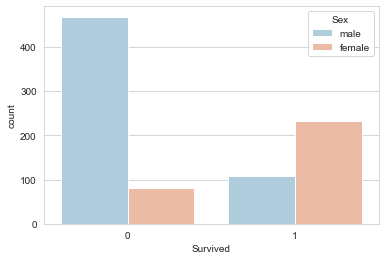

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

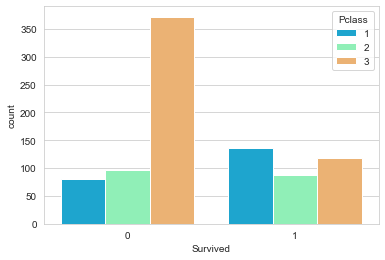

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


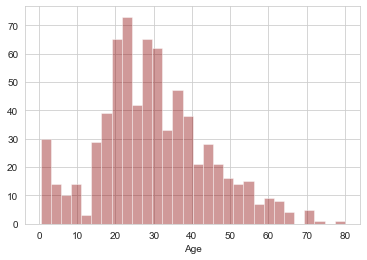

In [10]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=30)

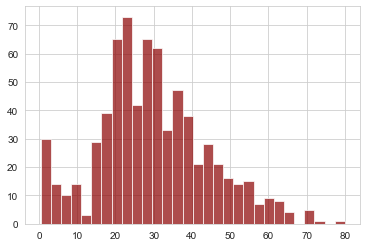

In [11]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.7)

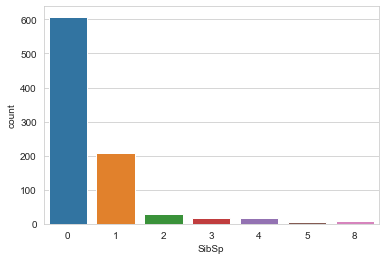

In [12]:
sns.countplot(x='SibSp',data=titanic)

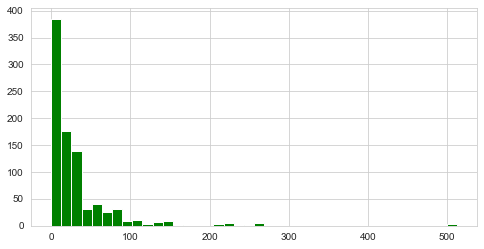

In [13]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can check the average age by passenger class:

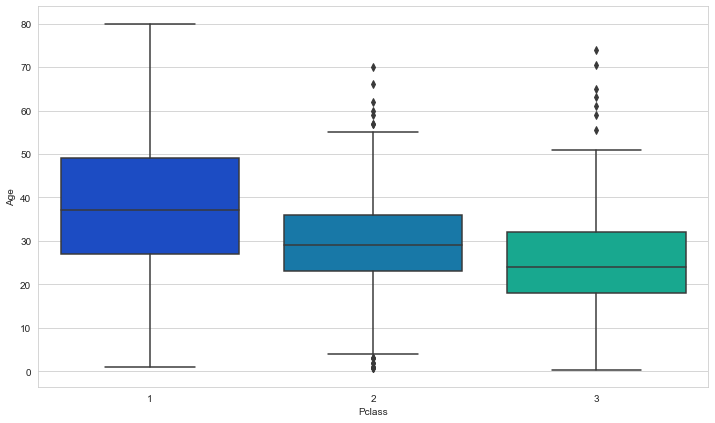

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic, palette='winter')

Wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24
    else:
        return Age

In [17]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

Check that heat map again:

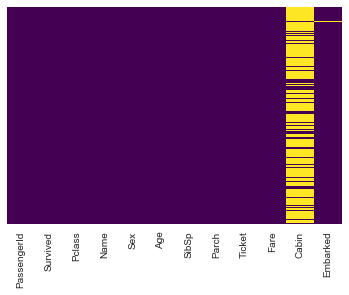

In [18]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column and the row in Embarked that is NaN.

In [19]:
titanic.drop('Cabin',axis=1,inplace=True)

In [20]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [19]:
titanic.dropna(inplace=True) # drop rows with missing Embarked
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [23]:
titanic.info()
titanic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [25]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True) 
# check out: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [26]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [27]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [29]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [30]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


# Building a Logistic Regression model

We split our data into a training set and test set.

## Train-Test Split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/Penghang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
coeff_df = pd.DataFrame(data = logmodel.coef_.T, index = X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
PassengerId,0.000438
Pclass,-0.729372
Age,-0.025158
SibSp,-0.266550
Parch,-0.105401
Fare,0.007952
male,-2.467132
Q,0.056093
S,-0.232746


In [37]:
# intercept
print(logmodel.intercept_)

[3.19498471]


In [38]:
predictions = logmodel.predict(X_test)

## Evaluation

We can check precision, recall, f1-score using classification report

* precision: number of true positives (i.e. the number of items correctly labeled as belonging to the positive class) divided by the total number of elements predicted as belonging to the positive class 
  
>  TP/(TP+FP)

* recall: number of true positives divided by the total number of elements that actually belong to the positive class 

>  TP/(TP + FN)

* f1-score: the harmonic mean of precision and recall

>  2 precision x recall/(precision + recall)
              
* accuracy: number of correct prediction divided by total number of predictions

>  (TP+TN)/(TP+TN+FP+FN)

* macro avg: averaging the unweighted mean per label
* weighted avg: averaging the support-weighted mean per label

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       154
           1       0.79      0.64      0.71       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.76       268
weighted avg       0.78      0.78      0.77       268

